# Lab 5 - Data Visualization

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

## NFL Offense Data

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

In [26]:
import pandas as pd
df_3 = pd.read_csv("nfloffenseweek3.csv")
df_4 = pd.read_csv("nfloffenseweek4.csv")
df_5 = pd.read_csv("nfloffenseweek5.csv")
team_data = pd.read_csv("nfl_teams.csv")
team_data.columns = ['ID', 'team', 'Abbreviation', 'Conference', 'Division']
df_3["week"] = 3
df_4["week"] = 4
df_5["week"] = 5
nfl_df = df_3.merge(df_4, how = "outer").merge(df_5, how = "outer").merge(team_data)

In [27]:
df = pd.read_csv("nfloffenseweek3.csv")
df.head()

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,406,2,5.6,18,8,44,5,42.9,8.6,35.63
1,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,...,511,5,5.9,20,15,129,5,40.5,5.4,31.05
2,3,Buffalo Bills,3,91,1324,213,6.2,5,3,77,...,337,1,4.7,22,20,136,6,46.7,16.7,47.46
3,4,Kansas City Chiefs,3,88,1122,180,6.2,3,2,68,...,279,2,4.1,15,15,124,8,45.2,6.5,40.73
4,5,Philadelphia Eagles,3,86,1341,208,6.4,1,0,73,...,451,6,4.4,26,23,173,6,39.4,3.0,45.06


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

<BarContainer object of 29 artists>

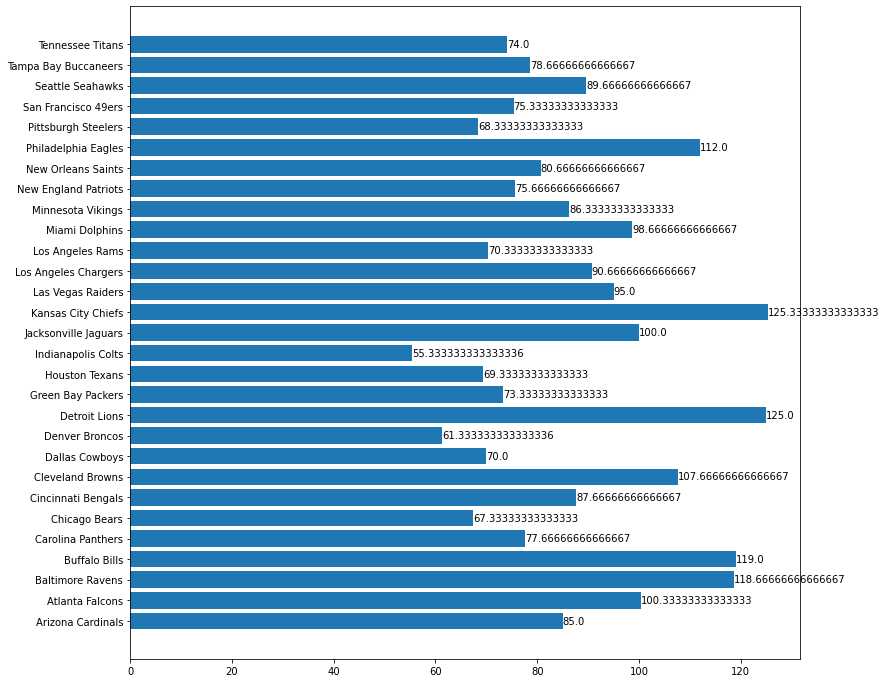

In [28]:
plt.figure(figsize=(12, 12))

avg_pts_scored = nfl_df.groupby('team').points_scored.mean()

#fig, ax = plt.subplots()
barhplot = plt.barh(avg_pts_scored.index, avg_pts_scored)
#df.points_scored )
plt.bar_label(barhplot, labels = avg_pts_scored)
barhplot

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

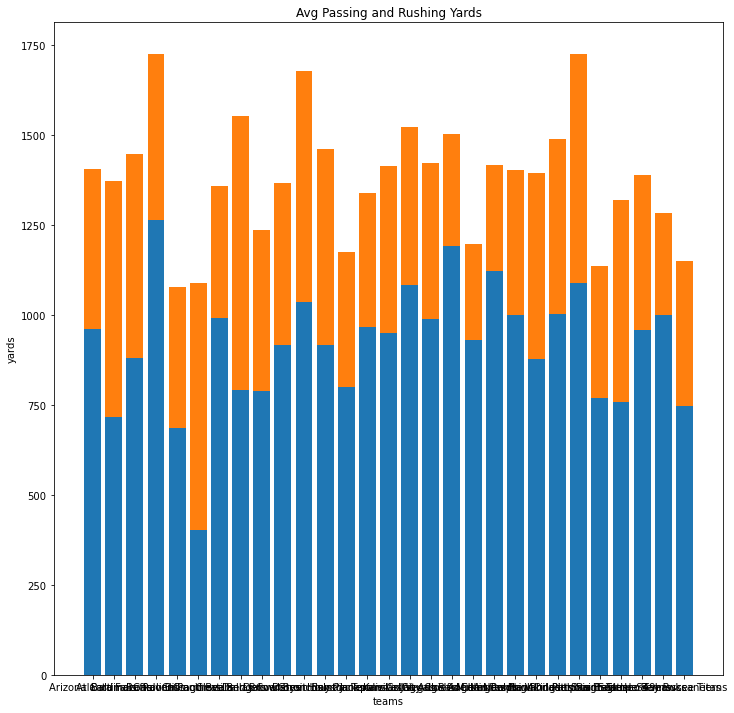

In [29]:
plt.figure(figsize=(12,12))
pass_yards = nfl_df.groupby("team").passing_yards.mean()
rush_yards = nfl_df.groupby("team").rushing_yards.mean()
plt.bar(pass_yards.index, pass_yards)
plt.bar(pass_yards.index, rush_yards, bottom= pass_yards)
# barh -> horizontal graph
plt.title('Avg Passing and Rushing Yards')
plt.xlabel('teams')
plt.ylabel('yards')
plt.show()

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

Text(0, 0.5, 'Total Yards')

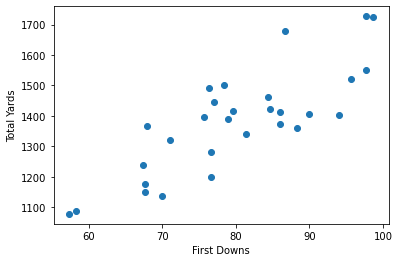

In [30]:
teams_by_total_yds = nfl_df.groupby('team').total_yards.mean()
teams_by_frst_downs = nfl_df.groupby('team')['1st_downs'].mean()
plt.scatter(teams_by_frst_downs, teams_by_total_yds)
plt.xlabel('First Downs')
plt.ylabel('Total Yards')

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

Text(0, 0.5, 'Penalty Yards')

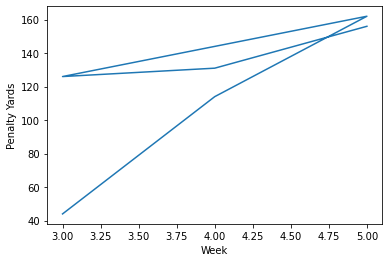

In [31]:
penalty_yds = nfl_df[(nfl_df.team == 'Baltimore Ravens') | (nfl_df.team == 'Los Angeles Rams')][['penalty_yards']]
weeks = nfl_df[(nfl_df.team == 'Baltimore Ravens') | (nfl_df.team == 'Los Angeles Rams')][['week']]
plt.plot(weeks.values, penalty_yds.values)
plt.xlabel('Week')
plt.ylabel('Penalty Yards')

6. Plot the average total points vs average yards per play for each team as a bar chart (with total points on the y-axis and yards per play on the x-axis).

Text(0, 0.5, 'Total Points')

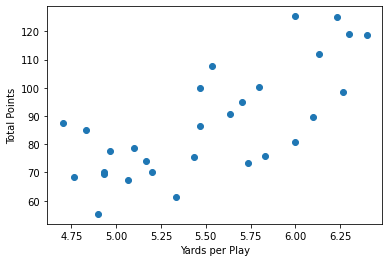

In [32]:
avg_total_pts = nfl_df.groupby('team').points_scored.mean()
avg_yds_per_play = nfl_df.groupby('team').yards_per_play.mean()
plt.scatter(avg_yds_per_play, avg_total_pts)
plt.xlabel('Yards per Play')
plt.ylabel("Total Points")

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

Text(0, 0.5, 'Penalty Yards')

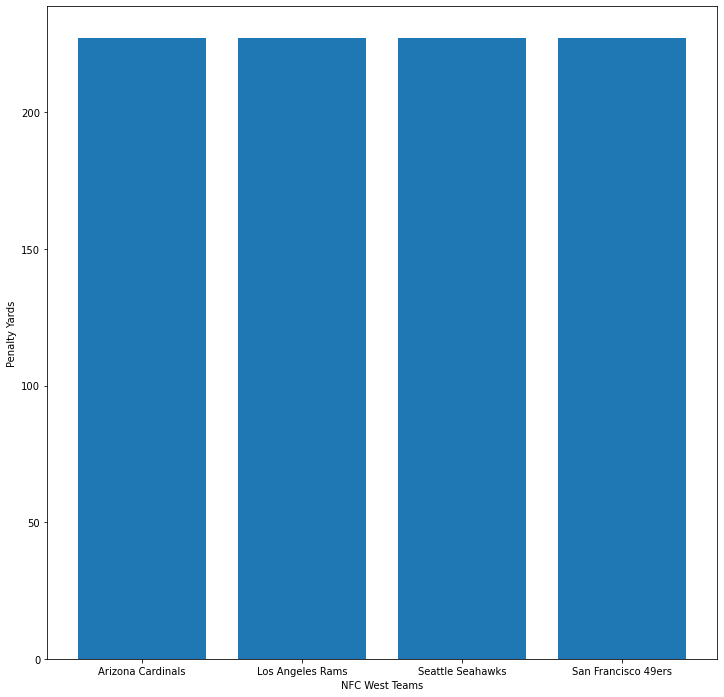

In [33]:
plt.figure(figsize=(12,12))
nfc_west = nfl_df[(nfl_df.Conference == 'NFC') & (nfl_df.Division == 'West')]
plt.bar(nfc_west.team, nfc_west.penalty_yards.mean())
plt.xlabel('NFC West Teams')
plt.ylabel('Penalty Yards')

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

Text(0, 0.5, 'Avg Weekly Points')

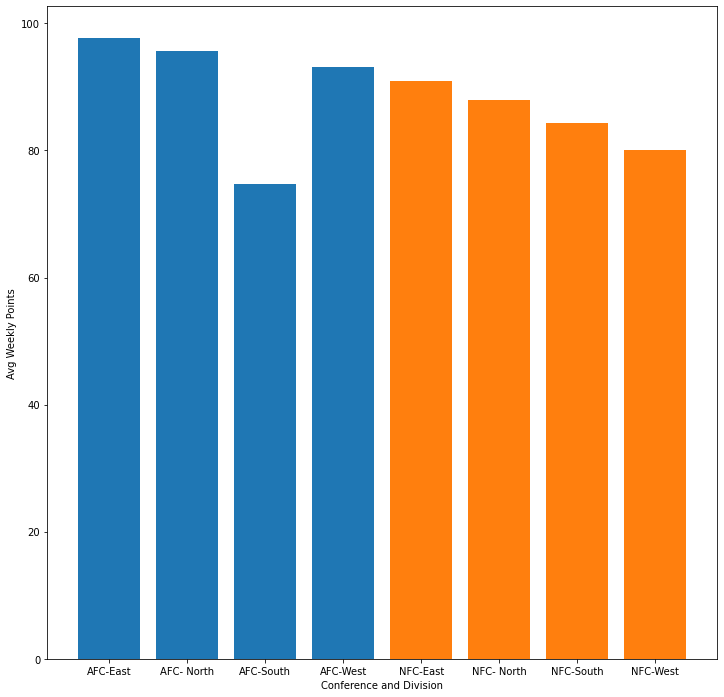

In [34]:
#divisions = nfl_df.groupby(['Conference', 'Division']).points_scored.mean()
afc_divisions = nfl_df[nfl_df.Conference == 'AFC'].groupby('Division').points_scored.mean()
afc_divisions.index = ['AFC-East', 'AFC- North', 'AFC-South', 'AFC-West']
#for index in afc_divisions.index:
    #index = f'AFC-{index}'

nfc_divisions = nfl_df[nfl_df.Conference == 'NFC'].groupby('Division').points_scored.mean()
nfc_divisions.index = ['NFC-East', 'NFC- North', 'NFC-South', 'NFC-West']

plt.figure(figsize=(12,12))
plt.bar(afc_divisions.index, afc_divisions)
plt.bar(nfc_divisions.index, nfc_divisions)

plt.xlabel('Conference and Division')
plt.ylabel('Avg Weekly Points')


